In [72]:
import pytz
from datetime import datetime

import matplotlib.pyplot as plt

from acnportal import acnsim
from acnportal import algorithms

In [73]:

# Timezone of the ACN we are using.
timezone = pytz.timezone('America/Los_Angeles')

# Start and End times are used when collecting data.
start = timezone.localize(datetime(2018, 9, 5))
end = timezone.localize(datetime(2018, 9, 6))

# How long each time discrete time interval in the simulation should be.
period = 5  # minutes

# Voltage of the network.
voltage = 220  # volts

# Default maximum charging rate for each EV battery.
default_battery_power = 32 * voltage / 1000 # kW

# Identifier of the site where data will be gathered.
site = 'caltech'

In [74]:
# For this experiment we use the predefined CaltechACN network.
cn = acnsim.sites.caltech_acn(basic_evse=True, voltage=voltage)

In [75]:
API_KEY = 'g5_9uHLYls2MxZ2FCtgwwtWSti4MtvyqDpZyRavuzGw'
events = acnsim.acndata_events.generate_events(API_KEY, site, start, end, period, voltage, default_battery_power)

In [78]:
sch = algorithms.ConstantCharging(10)

In [79]:
sim = acnsim.Simulator(cn, sch, events, start, period=period, verbose=False)

In [80]:
sim.run()

IndexError: index 287 is out of bounds for axis 1 with size 287

In [30]:
total_energy_prop = acnsim.proportion_of_energy_delivered(sim)
print('Proportion of requested energy delivered: {0}'.format(total_energy_prop))

Proportion of requested energy delivered: 1.0


In [31]:
print('Peak aggregate current: {0} A'.format(sim.peak))

Peak aggregate current: 655.5240056818182 A


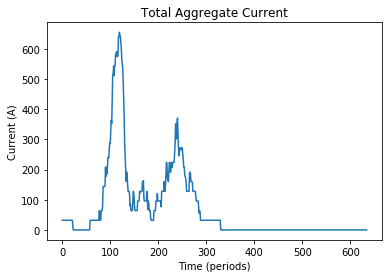

In [32]:

# Plotting aggregate current
agg_current = acnsim.aggregate_current(sim)
plt.plot(agg_current)
plt.xlabel('Time (periods)')
plt.ylabel('Current (A)')
plt.title('Total Aggregate Current')
plt.show()